# Librosa: Music in Python

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import IPython.display
import librosa
import librosa.display

### Loading the Songs

Librosa has a simple function to import an audio file, using `librosa.load()` to read most audio filetypes.
This converts the audio file into a tuple containing 2 items: a timeseries representing the audio, and the sample rate. The sample rate is also an optional perameter for `load` with a default of 22050, measured in Hz.

In [2]:
audio_paths = ['Rudie_Cant_Fail.m4a',
               'Rolling_in_the_Deep.m4a',
               'What_About_Love.m4a']#librosa.util.example_audio_file()
names = ["Rudie Can't Fail by The Clash",
         "Rolling in the Deep by Adele",
         "What About Love by Heart"]

songs = []

for i,path in enumerate(audio_paths):
    a, sr = librosa.load('songs/' + path, sr=44100)
    songs.append((a,sr,names[i]))


So now we have an audio file represented as a timeseries, ubt what can we do with that? We could plot it like we would normally do with a timeseries, so let's see what that looks like:

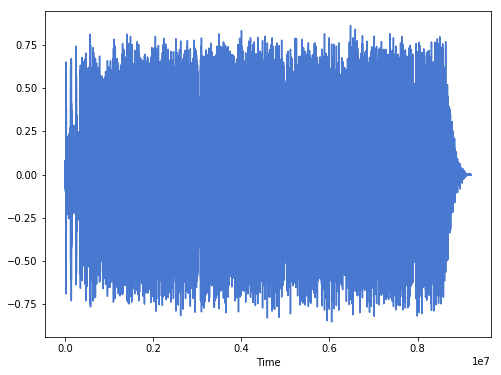

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(songs[0][0])
ax.set_xlabel('Time')
ax.set_ylabel('')
plt.show()

But that's not very informative. So let's see what other information we can extrapolate from this data using librosa.

### Mel Power Spectrograms

The first thing we can do is convert our audio into the Mel scale. The Mel scale is a scale of pitches judged by listeners to be equal to each other. What this means is that we can create a mel spectrogram, which will show us pitch frequencey and decibel level in one image.

Here we have spectrograms of songs by The Clash, Adele, and Heart. The y axis is in Hz, which means higher on the y axis is higher pitch. The colors tell us about dB level, where lighter colors indicate higher volume, and darker colors indicate lower volume.

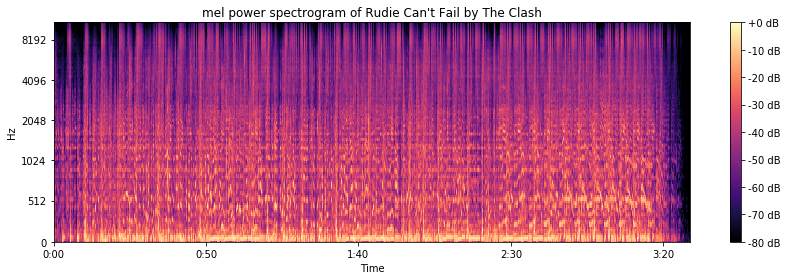

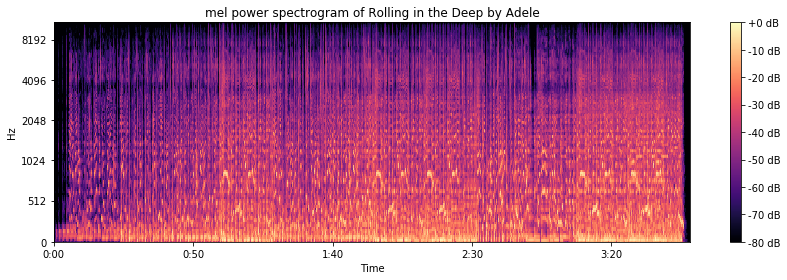

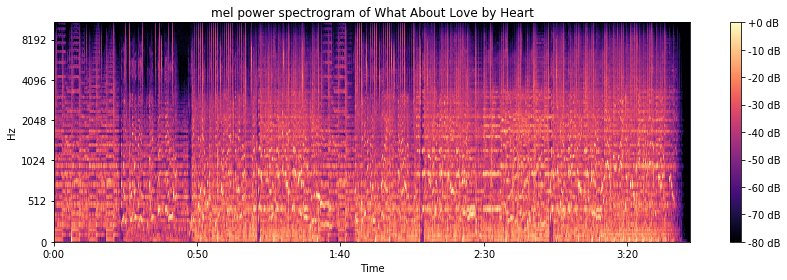

In [7]:
logs = []

for i,song in enumerate(songs):
    y,sr,title = song
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    logs.append(log_S)
    
    ls = log_S[:,:6000]
    
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, hop_length=512 ,x_axis='time', y_axis='mel')

    plt.title("mel power spectrogram of " + title)
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

Now we have zoomed in on 10 second segments of each song, to get a better look at the variations going on. Now we can better see how Rudie Can't Fail hits high notes at regular intervals, but only for brief moments. Rolling in the Deep starts out quieter and with lower pitches, and What About Love has a dip where the high notes fade for about 5 seconds.

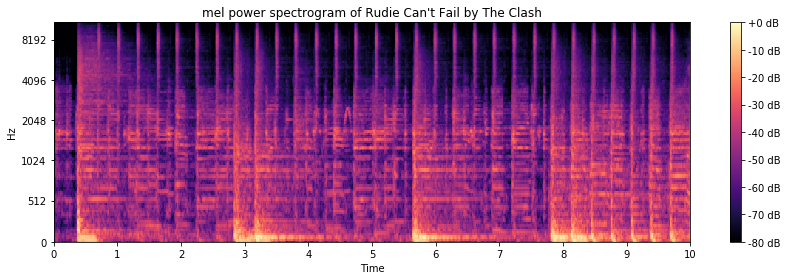

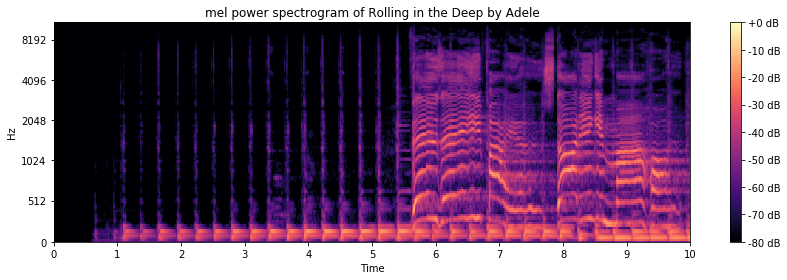

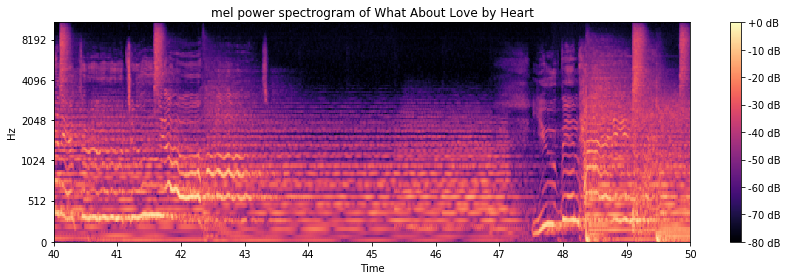

In [8]:
logs = []
start = [0,0,40]
stop = [10,10,50]

for i,song in enumerate(songs):
    y,sr,title = song
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    logs.append(log_S)
    
    ls = log_S[:,3500:4000]
    
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, hop_length=512 ,x_axis='time', y_axis='mel')
    plt.title("mel power spectrogram of " + title)
    plt.xlim((start[i],stop[i]))
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

### Splitting the Audio

For this next part, We're going to split the audio into Harmonics and Percussive Tracks, which normally overlap to form the complete spectrograph. Then we can display them seperately, to disect our tracks a little futher.

In [9]:
harmonics = []
percussives = []

for song in songs:
    h, p = librosa.effects.hpss(song[0])
    harmonics.append(h)
    percussives.append(p)

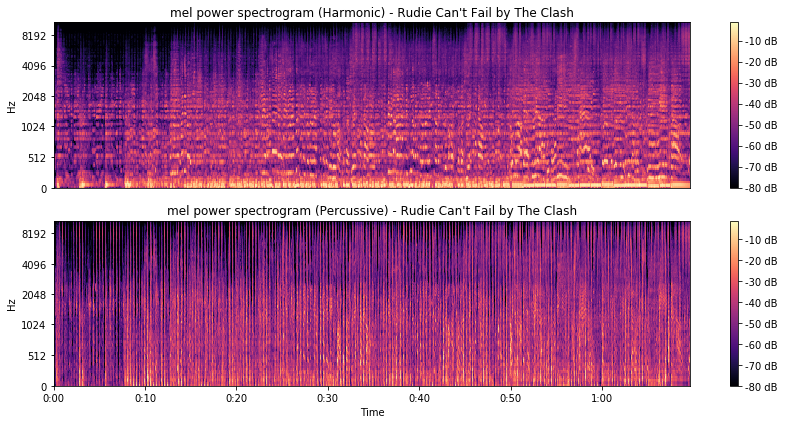

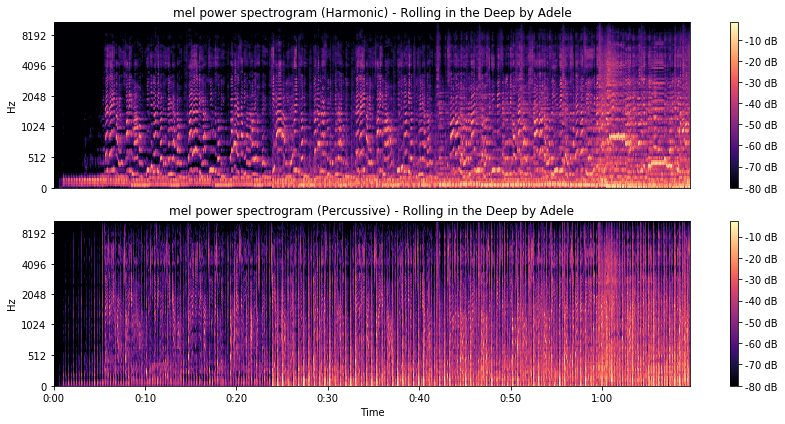

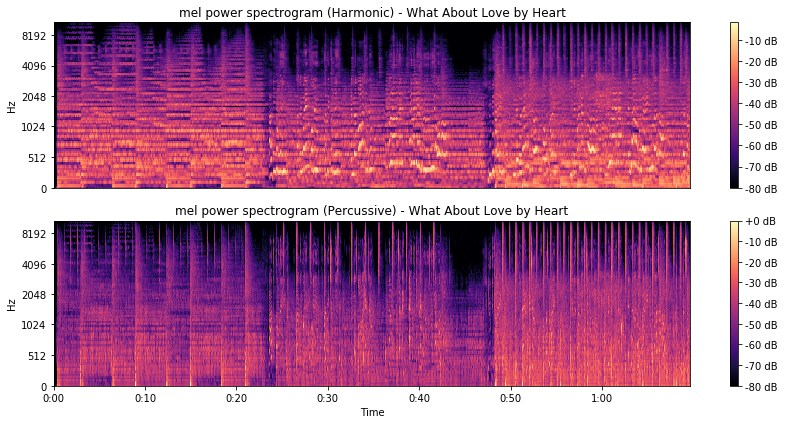

In [10]:
for i,song in enumerate(songs):
    y,sr,title = song
    y_harmonic = harmonics[i]
    y_percussive = percussives[i]
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
    S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
    log_Sp = librosa.power_to_db(S_percussive, ref=np.max)
    lh = log_Sh[:,:6000]
    lp = log_Sp[:,:6000]

    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    librosa.display.specshow(lh, sr=sr, y_axis='mel')
    plt.title('mel power spectrogram (Harmonic) - ' + title)
    plt.colorbar(format='%+02.0f dB')
    plt.subplot(2,1,2)
    librosa.display.specshow(lp, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram (Percussive) - ' + title)
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

### Pitches and Keys

With the harmonic and percussive tracks we can display a Chromograph, which is like a heatmap that shows the key and intensity of notes being played over time. Louder notes are displayed as lighter, and quieter is displayed as darker.

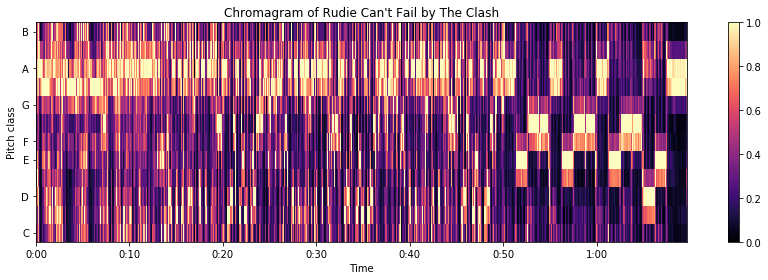

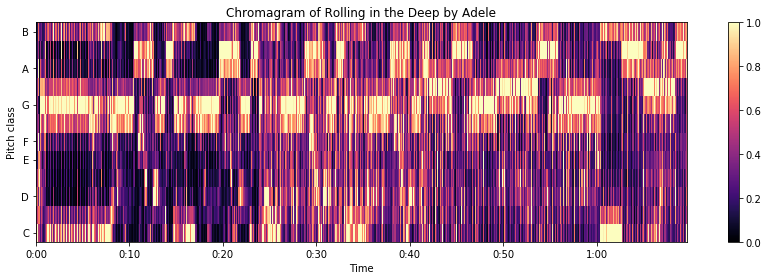

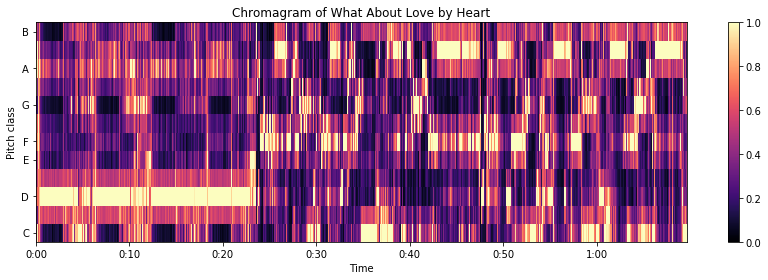

In [11]:
for i, song in enumerate(songs):
    y,sr,title = song
    y_harmonic = harmonics[i]
    y_percussive = percussives[i]
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

    C_new = C[:,:6000]
    # Display the chromagram: the energy in each chromatic pitch class as a function of time
    # To make sure that the colors span the full range of chroma values, set vmin and vmax
    plt.figure(figsize=(12,4))
    librosa.display.specshow(C_new, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

    plt.title('Chromagram of ' + title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

By looking at trends in these chromographs we can begin to have an idea of major keys for these songs. 


### Beats Per Minute

Another thing we can look at is tempo and beats. By using `librosa.beat.tempo` we can extract the overall tempo for a song in beats per minute(bpm), but we can also use `librosa.beat.beat_track` to return the tempo and a numpy array containing the numbers of each beat. One thing we can do with this is to plot the spectrogram of the audio, but this time with the beats overlaid.

<Figure size 864x288 with 0 Axes>

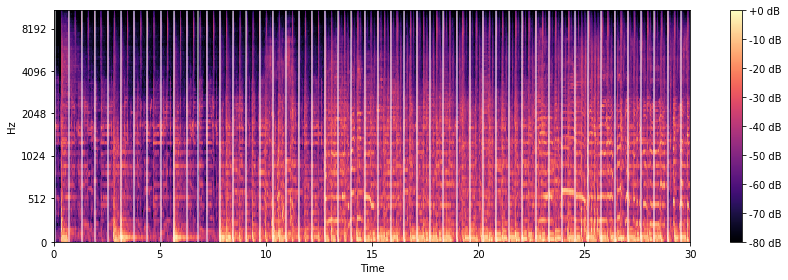

<Figure size 864x288 with 0 Axes>

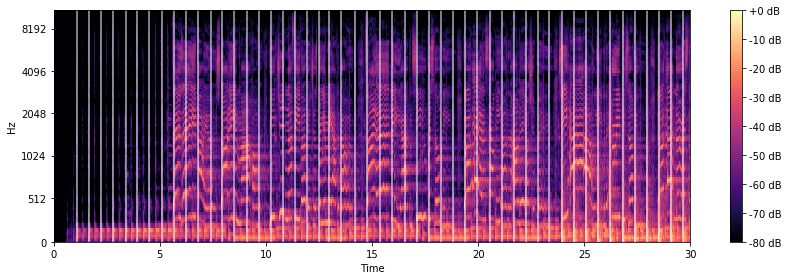

<Figure size 864x288 with 0 Axes>

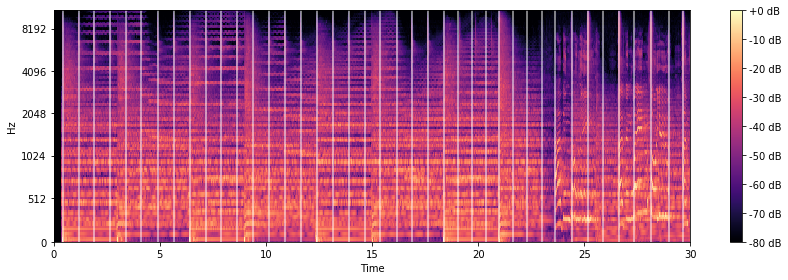

In [14]:
for i,song in enumerate(songs):
    y,sr,title = songs[i]
    plt.figure(figsize=(12, 4))
    
    tempo, beats = librosa.beat.beat_track(y=percussives[i], sr=sr)
    # Let's re-draw the spectrogram, but this time, overlay the detected beats
    plt.figure(figsize=(12,4))
    librosa.display.specshow(logs[i], sr=sr, x_axis='time', y_axis='mel')
    plt.vlines(librosa.frames_to_time(beats, sr=sr),
                   1, sr * 0.25,
                   colors='white', linestyles='-', linewidth=2, alpha=0.5)
    plt.xlim((0,30))
    #plt.axis('tight')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show();

In [13]:
#librosa.frames_to_time(beats)
type(beats)

numpy.ndarray